In [29]:
import pandas as pd
from sqlalchemy import create_engine
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense


from sklearn.preprocessing import MinMaxScaler

ERROR! Session/line number was not unique in database. History logging moved to new session 1289


In [30]:
csv_path='static/data/BBG_price_data.csv'

In [31]:
df = pd.read_csv(csv_path)
df

,Date,Corn Price,Wheat Price,Soybean Price,Cotton Price,Live Cattle
0,1/4/2010,418.50,557.75,1049.50,76.00,85.375
1,1/5/2010,418.75,553.00,1052.25,73.12,86.325
2,1/6/2010,421.75,567.25,1050.50,73.55,85.950
3,1/7/2010,417.50,557.75,1017.75,72.89,85.925
4,1/8/2010,423.00,568.50,1013.00,72.44,85.825
...,...,...,...,...,...,...
2896,7/2/2021,697.25,645.75,1451.75,86.03,122.000
2897,7/6/2021,656.00,620.00,1363.75,86.38,122.400
2898,7/7/2021,652.50,614.75,1386.50,86.63,120.600
2899,7/8/2021,638.00,612.25,1390.25,85.88,119.275


In [32]:
!pip install psycopg2

In [19]:
from sqlalchemy import create_engine
import psycopg2 
con_str = 'postgres:myAkina93!@database-1.c6qqzgohsabf.us-east-2.rds.amazonaws.com:5432/project2'
engine = create_engine(f'postgresql://{con_str}')

In [20]:
df.to_sql(name='price_raw_data', con=engine, if_exists='append', index=False)

In [21]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2901 entries, 0 to 2900
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           2901 non-null   object 
 1   Corn Price     2901 non-null   float64
 2   Wheat Price    2901 non-null   float64
 3   Soybean Price  2901 non-null   float64
 4   Cotton Price   2901 non-null   float64
 5   Live Cattle    2901 non-null   float64
dtypes: float64(5), object(1)
memory usage: 136.1+ KB


ERROR! Session/line number was not unique in database. History logging moved to new session 1287


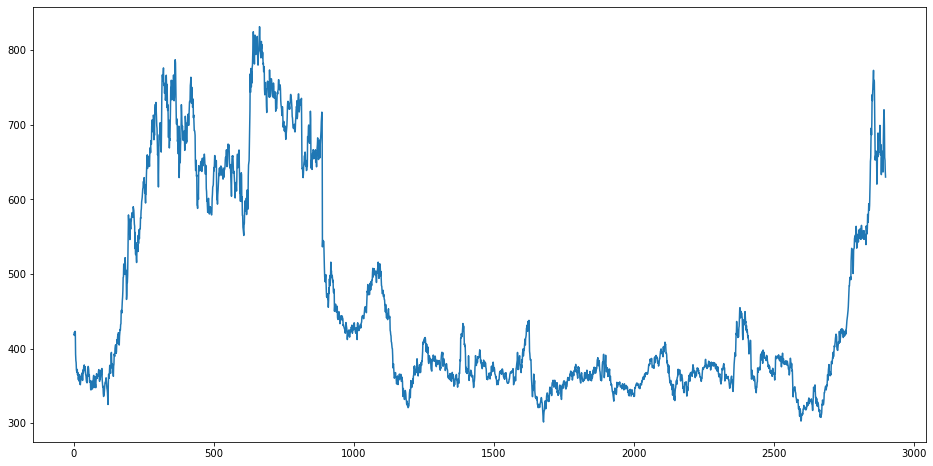

In [27]:
df["Date"]=pd.to_datetime(df.Date,format="%m/%d/%Y")
# df = df.set_index('Date', drop=True) 

plt.figure(figsize=(16,8))
plt.plot(df["Corn Price"],label='Corn Price history')

In [28]:
#Sort the data
# corn_df=df[['Corn Price']]
# corn_df.head()
df.head()
first_df = df.drop(columns = ['Wheat Price','Soybean Price','Cotton Price','Live Cattle'])
first_df.head()

,Date,Corn Price
0,2010-01-04,418.50
1,2010-01-05,418.75
2,2010-01-06,421.75
3,2010-01-07,417.50
4,2010-01-08,423.00


In [ ]:
#Normalize the smaller dataset
#first_df['Date'].astype('int64')
scaler=MinMaxScaler(feature_range=(0,1))
final_dataset = first_df.values

final_dataset=scaler.fit_transform(final_dataset)

train_data=final_dataset[0:1450,:]
valid_data=final_dataset[1450:,:]

new_dataset.index=new_dataset.Date
new_dataset.drop("Date",axis=1,inplace=True)
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_dataset)
x_train_data,y_train_data=[],[]
for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])
    
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)
x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\erinn\Anaconda3\envs\BootCampML\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-33-a3c48f910e61>", line 6, in <module>
    final_dataset=scaler.fit_transform(final_dataset)
  File "C:\Users\erinn\Anaconda3\envs\BootCampML\lib\site-packages\sklearn\base.py", line 699, in fit_transform
    return self.fit(X, **fit_params).transform(X)
  File "C:\Users\erinn\Anaconda3\envs\BootCampML\lib\site-packages\sklearn\preprocessing\_data.py", line 363, in fit
    return self.partial_fit(X, y)
  File "C:\Users\erinn\Anaconda3\envs\BootCampML\lib\site-packages\sklearn\preprocessing\_data.py", line 398, in partial_fit
    force_all_finite="allow-nan")
  File "C:\Users\erinn\Anaconda3\envs\BootCampML\lib\site-packages\sklearn\base.py", line 421, in _validate_data
    X = check_array(X, **check_params)
  File "C:\Users\erinn\Anaconda3\envs\BootCamp

In [11]:
df.head()

,Corn Price,Wheat Price,Soybean Price,Cotton Price,Live Cattle
Date,,,,,
2010-01-04,418.50,557.75,1049.50,76.00,85.375
2010-01-05,418.75,553.00,1052.25,73.12,86.325
2010-01-06,421.75,567.25,1050.50,73.55,85.950
2010-01-07,417.50,557.75,1017.75,72.89,85.925
2010-01-08,423.00,568.50,1013.00,72.44,85.825


In [ ]:
x_train_data,y_train_data=[],[]

for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])
    
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)

x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\erinn\Anaconda3\envs\BootCampML\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-12-0e3e9bcb0f60>", line 4, in <module>
    x_train_data.append(scaled_data[i-60:i,0])
NameError: name 'scaled_data' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\erinn\Anaconda3\envs\BootCampML\lib\site-packages\IPython\core\interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\erinn\Anaconda3\envs\BootCampML\lib\site-packages\IPython\core\ultratb.py", line 1169, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_contex

In [45]:
#Build and train the LSTM model
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)


ERROR! Session/line number was not unique in database. History logging moved to new session 1204
Epoch 1/1
 - 175s - loss: 0.0039


In [46]:
inputs_data=final_dataset[len(final_dataset)-len(valid_data)-60:]
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)

X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_corn_price=lstm_model.predict(X_test)
predicted_corn_price=scaler.inverse_transform(predicted_corn_price)

In [47]:
lstm_model.save("saved_model.h5")

C:\Users\erinn\Anaconda3\envs\BootCampML\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


ERROR! Session/line number was not unique in database. History logging moved to new session 1206


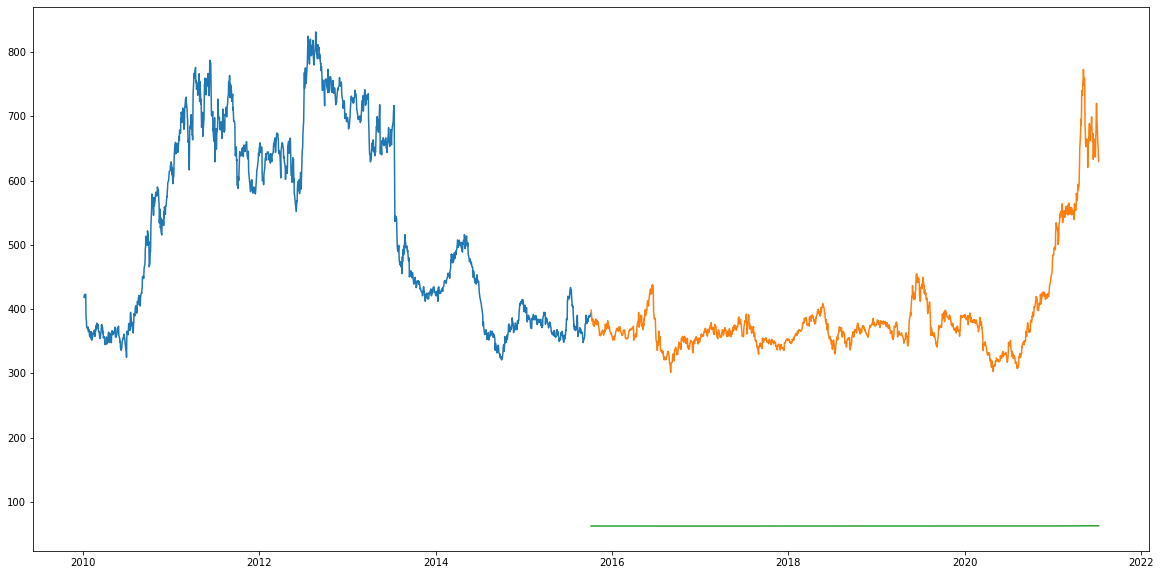

In [48]:
#Visualize
train_data=corn_df[:1450]
valid_data=corn_df[1450:]
valid_data['Predictions']=predicted_corn_price
plt.plot(train_data["Corn Price"])
plt.plot(valid_data[['Corn Price',"Predictions"]])